In [13]:
import numpy as np
import numpy.ma as ma

In [14]:
np.random.seed(42)
x = ma.MaskedArray(ma.masked_less(np.random.rand(2, 3, 4), 0.1))

print("Before, \n", x)
print("Shape, ", x.shape)
mask = np.apply_over_axes(np.logical_or.reduce, x.mask, (0))
mask = np.broadcast_to(mask, x.shape)

Before, 
 [[[0.3745401188473625 0.9507143064099162 0.7319939418114051
   0.5986584841970366]
  [0.15601864044243652 0.15599452033620265 -- 0.8661761457749352]
  [0.6011150117432088 0.7080725777960455 -- 0.9699098521619943]]

 [[0.8324426408004217 0.21233911067827616 0.18182496720710062
   0.18340450985343382]
  [0.3042422429595377 0.5247564316322378 0.43194501864211576
   0.2912291401980419]
  [0.6118528947223795 0.13949386065204183 0.29214464853521815
   0.3663618432936917]]]
Shape,  (2, 3, 4)


In [15]:
x = ma.MaskedArray(x, mask)
print("New mask: \n", x)
print("Shape, ", x.shape)

New mask: 
 [[[0.3745401188473625 0.9507143064099162 0.7319939418114051
   0.5986584841970366]
  [0.15601864044243652 0.15599452033620265 -- 0.8661761457749352]
  [0.6011150117432088 0.7080725777960455 -- 0.9699098521619943]]

 [[0.8324426408004217 0.21233911067827616 0.18182496720710062
   0.18340450985343382]
  [0.3042422429595377 0.5247564316322378 -- 0.2912291401980419]
  [0.6118528947223795 0.13949386065204183 -- 0.3663618432936917]]]
Shape,  (2, 3, 4)


In [16]:
x_b = x.reshape((x.shape[0], x.shape[1]*x.shape[2])).T
print("Reshape into ensemble size: \n", x) 
print("Shape, ", x.shape)

Reshape into ensemble size: 
 [[[0.3745401188473625 0.9507143064099162 0.7319939418114051
   0.5986584841970366]
  [0.15601864044243652 0.15599452033620265 -- 0.8661761457749352]
  [0.6011150117432088 0.7080725777960455 -- 0.9699098521619943]]

 [[0.8324426408004217 0.21233911067827616 0.18182496720710062
   0.18340450985343382]
  [0.3042422429595377 0.5247564316322378 -- 0.2912291401980419]
  [0.6118528947223795 0.13949386065204183 -- 0.3663618432936917]]]
Shape,  (2, 3, 4)


In [58]:
x = x_b.data[~x_b.mask[:,0], :]
indx = np.arange(0, x_b.shape[0])
print("Good rows only \n", x)
print("Shape, ", x.shape)

Good rows only 
 [[0.37454012 0.83244264]
 [0.95071431 0.21233911]
 [0.73199394 0.18182497]
 [0.59865848 0.18340451]
 [0.15601864 0.30424224]
 [0.15599452 0.52475643]
 [0.86617615 0.29122914]
 [0.60111501 0.61185289]
 [0.70807258 0.13949386]
 [0.96990985 0.36636184]]
Shape,  (10, 2)


In [73]:
x_repeat = np.repeat(x_b, 2, axis=0)
indx_reshape = np.repeat(indx, 2).reshape(x_b.shape)
x_repeat[::2] = indx_reshape
x_repeat

masked_array(
  data=[[0.0, 0.0],
        [0.3745401188473625, 0.8324426408004217],
        [1.0, 1.0],
        [0.9507143064099162, 0.21233911067827616],
        [2.0, 2.0],
        [0.7319939418114051, 0.18182496720710062],
        [3.0, 3.0],
        [0.5986584841970366, 0.18340450985343382],
        [4.0, 4.0],
        [0.15601864044243652, 0.3042422429595377],
        [5.0, 5.0],
        [0.15599452033620265, 0.5247564316322378],
        [6.0, 6.0],
        [--, --],
        [7.0, 7.0],
        [0.8661761457749352, 0.2912291401980419],
        [8.0, 8.0],
        [0.6011150117432088, 0.6118528947223795],
        [9.0, 9.0],
        [0.7080725777960455, 0.13949386065204183],
        [10.0, 10.0],
        [--, --],
        [11.0, 11.0],
        [0.9699098521619943, 0.3663618432936917]],
  mask=[[False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
       

In [35]:
import pandas as pd
df = pd.read_csv('/home/nannau/Downloads/stellar.csv')[1:]
x = pd.to_numeric(df['ASTM E-490 AM0 Standard Spectra']).values
y = pd.to_numeric(df['Unnamed: 1']).values
standard = pd.to_numeric(df['Unnamed: 6']).values

In [41]:
import matplotlib.pyplot as plt
import numpy as np

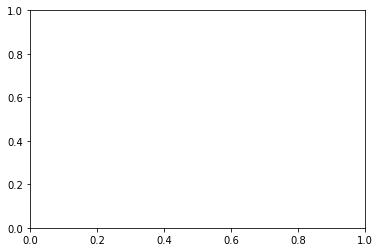

In [50]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

colorline(x[:600]*10, y[:600], z=standard[:600], cmap=plt.get_cmap('flag'))

#plt.xlabel('Wavelength A')
#plt.ylabel('Flux Wm-2 nm-1')